In [8]:
import json
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def parse_json(fname):
    data = ''
    with open(fname, 'r') as f:
        data = json.load(f)
    return data

In [3]:
def get_x_y(data):
    x = range(len(data['pitch']))
    y_a = data['pitch']
    y_b = data['yaw']
    return x, y_a, y_b

In [4]:
def diff_data(data):
    pitch = data['pitch']
    yaw = data['yaw']
    new_pitch_abs = []
    new_yaw_abs = []
    new_pitch = []
    new_yaw = []

    for i in range(len(pitch) - 1):
        new_pitch_abs.append(abs(pitch[i+1] - pitch[i]))
        new_yaw_abs.append(abs(yaw[i+1] - yaw[i]))
        new_pitch.append(pitch[i+1] - pitch[i])
        new_yaw.append(yaw[i+1] - yaw[i])

    data_abs = {}
    data_abs['pitch'] = new_pitch_abs
    data_abs['yaw'] = new_yaw_abs
    data = {}
    data['pitch'] = new_pitch
    data['yaw'] = new_yaw

    return data_abs, data

In [5]:
def plot_2d(**kwargs):
    x = kwargs['x']
    y1_a = kwargs['y1_a']
    y1_b = kwargs['y1_b']
    y2_a = kwargs['y2_a']
    y2_b = kwargs['y2_b']
    ylabel_a = kwargs['ylabel_a']
    ylabel_b = kwargs['ylabel_b']
    xlabel = kwargs['xlabel']
    title = kwargs['title']

    plt.subplot(2, 1, 1)
    plt.plot(x, y1_a, '--', color='r', label='Cheat')
    plt.plot(x, y2_a, '-', color='g', label='No cheat')
    plt.title(title)
    plt.ylabel(ylabel_a)

    plt.subplot(2, 1, 2)
    plt.plot(x, y1_b, '--', color='r', label='Cheat')
    plt.plot(x, y2_b, '-', color='g', label='No cheat')
    plt.ylabel(ylabel_b)
    plt.xlabel(xlabel)
    plt.legend()

    plt.show()

In [6]:
base = '/Users/jai/Documents/tmp/game/headshot/anticheat'
cheat_data = parse_json(os.path.join(base, 'aim_data_cheat.json'))
no_cheat_data = parse_json(os.path.join(base, 'aim_data_no_cheat.json'))

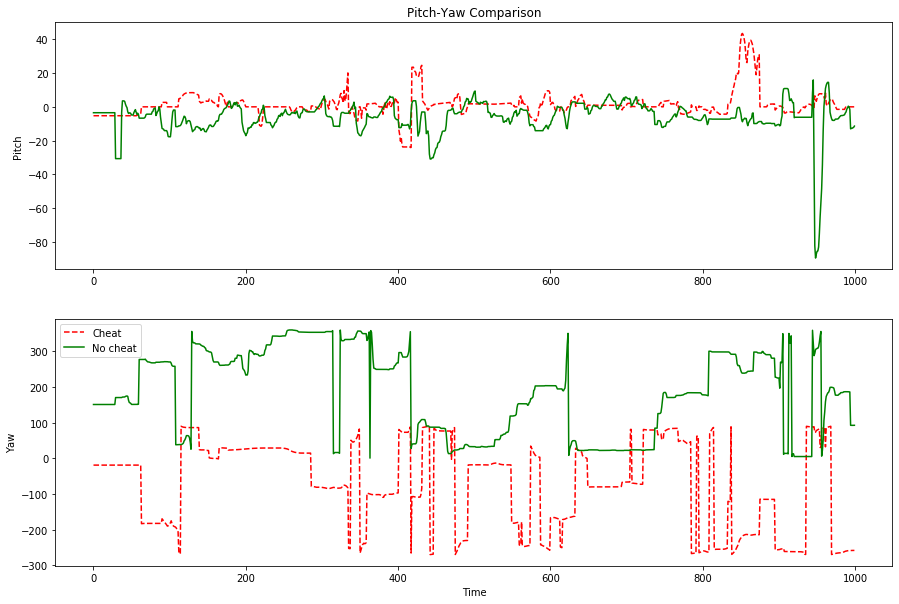

In [9]:
x, y1_a, y1_b = get_x_y(cheat_data)
_, y2_a, y2_b = get_x_y(no_cheat_data)
plot_2d(**{
    'x': x, 'y1_a': y1_a, 'y1_b': y1_b, 'y2_a': y2_a, 'y2_b': y2_b,
    'ylabel_a': 'Pitch', 'ylabel_b': 'Yaw', 'xlabel': 'Time', 'title': 'Pitch-Yaw Comparison',
    'name': 'pitch_yaw.svg'
})

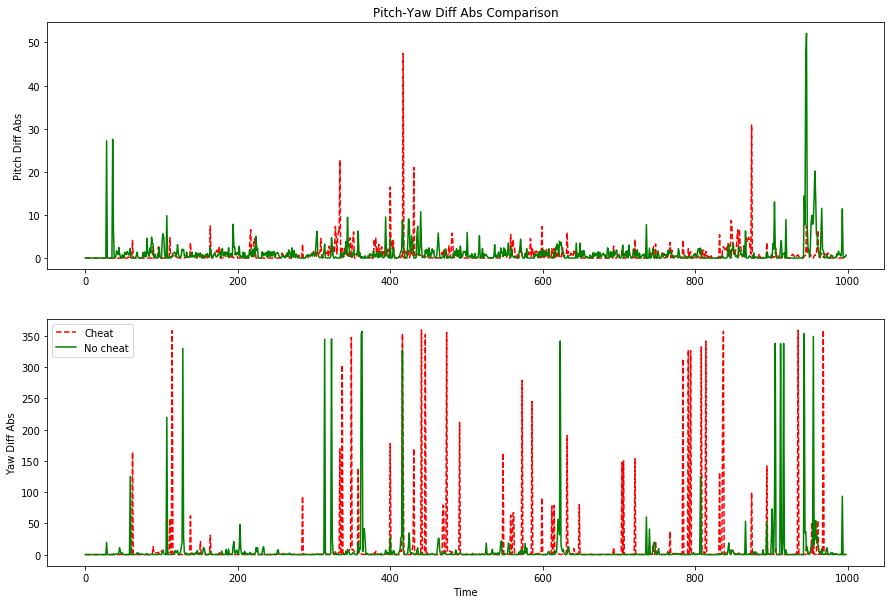

In [10]:
diff_abs_cheat, diff_cheat = diff_data(cheat_data)
diff_abs_no_cheat, diff_no_cheat = diff_data(no_cheat_data)

x, y1_a, y1_b = get_x_y(diff_abs_cheat)
_, y2_a, y2_b = get_x_y(diff_abs_no_cheat)
plot_2d(**{
    'x': x, 'y1_a': y1_a, 'y1_b': y1_b, 'y2_a': y2_a, 'y2_b': y2_b,
    'ylabel_a': 'Pitch Diff Abs', 'ylabel_b': 'Yaw Diff Abs', 'xlabel': 'Time', 'title': 'Pitch-Yaw Diff Abs Comparison',
    'name': 'pitch_yaw_abs_diff.svg'
})

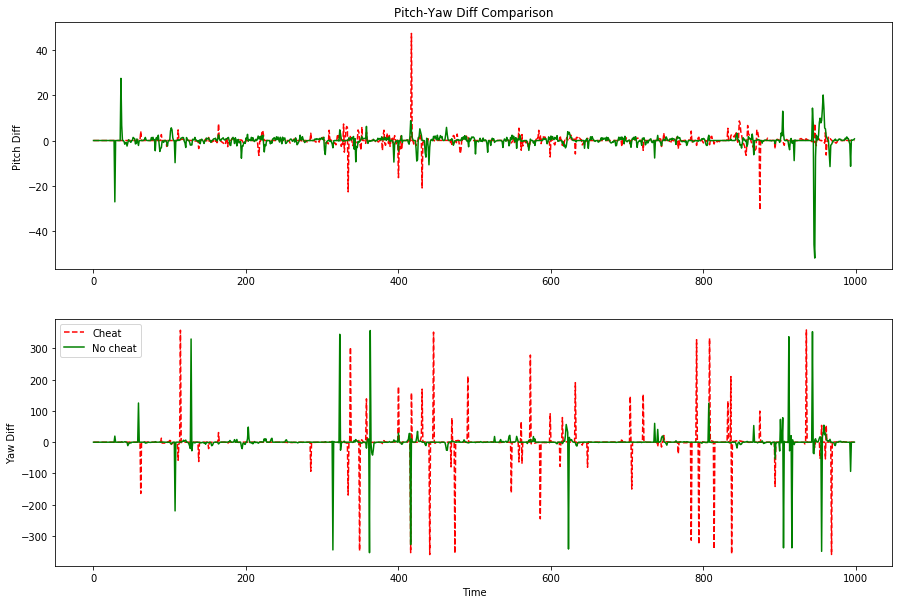

In [11]:
x, y1_a, y1_b = get_x_y(diff_cheat)
_, y2_a, y2_b = get_x_y(diff_no_cheat)
plot_2d(**{
    'x': x, 'y1_a': y1_a, 'y1_b': y1_b, 'y2_a': y2_a, 'y2_b': y2_b,
    'ylabel_a': 'Pitch Diff', 'ylabel_b': 'Yaw Diff', 'xlabel': 'Time', 'title': 'Pitch-Yaw Diff Comparison',
    'name': 'pitch_yaw_diff.svg'
})

In [12]:
def get_features(data):
    stddev_pitch = np.std(data['pitch'])
    stddev_yaw = np.std(data['yaw'])
    mean_pitch = np.mean(data['pitch'])
    mean_yaw = np.mean(data['pitch'])

    _, diff = diff_data(data)

    stddev_pitch_diff = np.std(diff['pitch'])
    stddev_yaw_diff = np.std(diff['yaw'])
    mean_pitch_diff = np.mean(diff['pitch'])
    mean_yaw_diff = np.mean(diff['yaw'])

    return (
        stddev_pitch, mean_pitch, stddev_pitch_diff, mean_pitch_diff
    ), (
        stddev_yaw, mean_yaw, stddev_yaw_diff, mean_pitch_diff
    )

In [13]:
def plot_3d(cheat_data, no_cheat_data, title):
    xa = [i[1] for i in cheat_data]
    ya = [i[2] for i in cheat_data]
    za = [i[3] for i in cheat_data]

    xb = [i[1] for i in no_cheat_data]
    yb = [i[2] for i in no_cheat_data]
    zb = [i[3] for i in no_cheat_data]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xa, ya, za, marker='o', color='r', label='Cheat')
    ax.scatter(xb, yb, zb, marker='^', color='g', label='No cheat')

    ax.set_xlabel('Standard Deviation')
    ax.set_ylabel('Mean')
    ax.set_zlabel('Standard Deviation Diff')

    plt.title(title)
    plt.legend()
    
    plt.show()

In [14]:
c_data_pitch = cheat_data['pitch']
n_data_pitch = no_cheat_data['pitch']
c_data_yaw = cheat_data['yaw']
n_data_yaw = no_cheat_data['yaw']

c_features_pitch = []
n_features_pitch = []
c_features_yaw = []
n_features_yaw = []

for i in range(0, len(c_data_pitch), 10):
    x = get_features(
        {'pitch': c_data_pitch[i:i+10], 'yaw': c_data_yaw[i:i+10]} 
    )
    y = get_features(
        {'pitch': n_data_pitch[i:i+10], 'yaw': n_data_yaw[i:i+10]}
    )
    c_features_pitch.append(x[0])
    n_features_pitch.append(y[0])
    c_features_yaw.append(x[1])
    n_features_yaw.append(y[1])

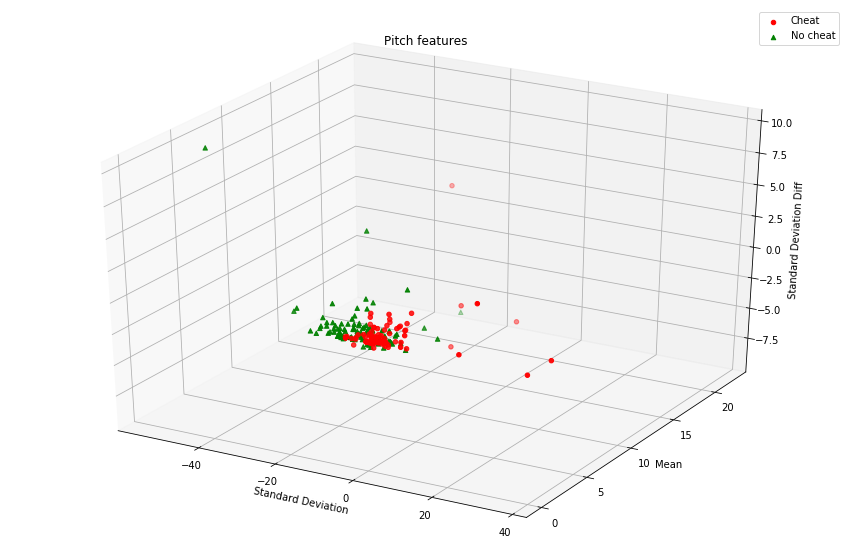

In [15]:
plot_3d(c_features_pitch, n_features_pitch, 'Pitch features')

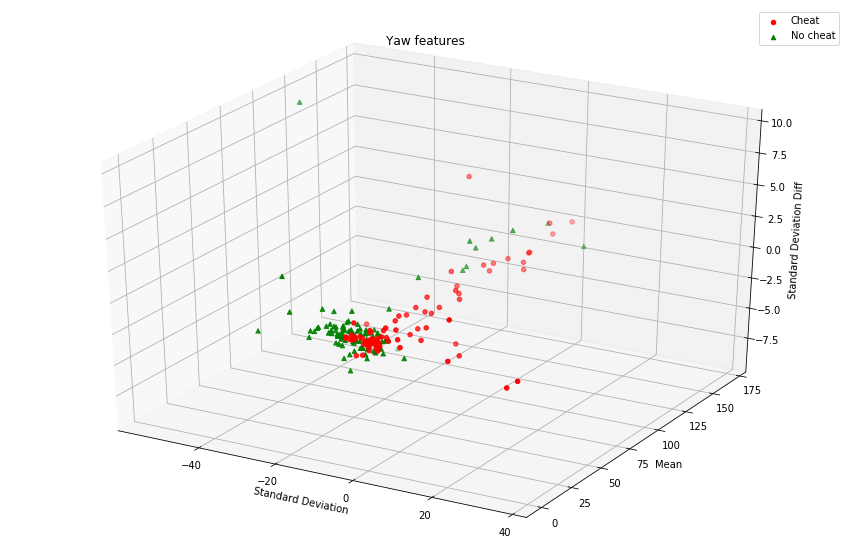

In [16]:
plot_3d(c_features_yaw, n_features_yaw, 'Yaw features')

In [19]:
c_pitch_min = min(c_data_pitch)
c_pitch_max = max(c_data_pitch)
n_pitch_min = min(n_data_pitch)
n_pitch_max = max(n_data_pitch)

c_yaw_min = min(c_data_yaw)
c_yaw_max = max(c_data_yaw)
n_yaw_min = min(n_data_yaw)
n_yaw_max = max(n_data_yaw)

normalised_c_data_pitch = list(map(lambda x: (x - c_pitch_min) / (c_pitch_max - c_pitch_min), c_data_pitch))
normalised_n_data_pitch = list(map(lambda x: (x - n_pitch_min) / (n_pitch_max - n_pitch_min), n_data_pitch))

normalised_c_data_yaw = list(map(lambda x: (x - c_yaw_min) / (c_yaw_max - c_yaw_min), c_data_yaw))
normalised_n_data_yaw = list(map(lambda x: (x - n_yaw_min) / (n_yaw_max - n_yaw_min), n_data_yaw))

normalised_c_features_pitch = []
normalised_n_features_pitch = []
normalised_c_features_yaw = []
normalised_n_features_yaw = []

for i in range(0, len(normalised_c_data_pitch), 10):
    x = get_features(
        {'pitch': normalised_c_data_pitch[i:i+10], 'yaw': normalised_c_data_yaw[i:i+10]} 
    )
    y = get_features(
        {'pitch': normalised_n_data_pitch[i:i+10], 'yaw': normalised_n_data_yaw[i:i+10]}
    )
    normalised_c_features_pitch.append(x[0])
    normalised_n_features_pitch.append(y[0])
    normalised_c_features_yaw.append(x[1])
    normalised_n_features_yaw.append(y[1])

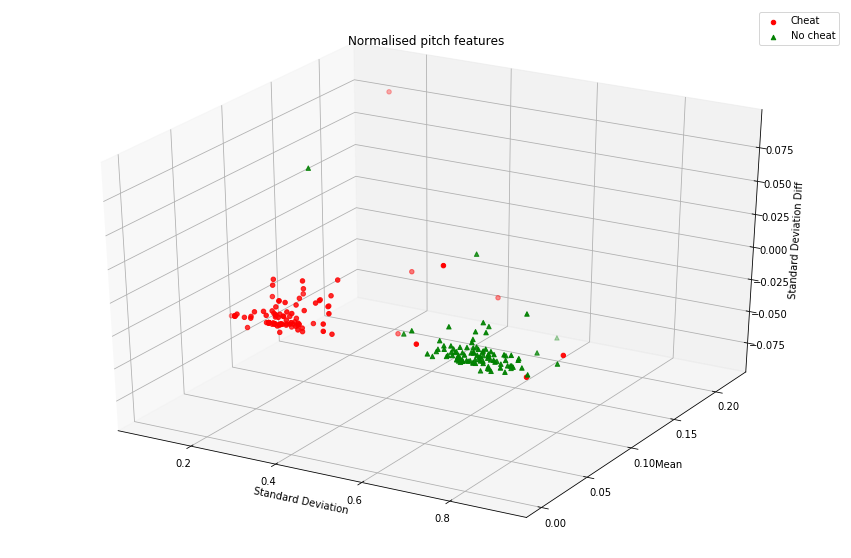

In [20]:
plot_3d(normalised_c_features_pitch, normalised_n_features_pitch, 'Normalised pitch features')

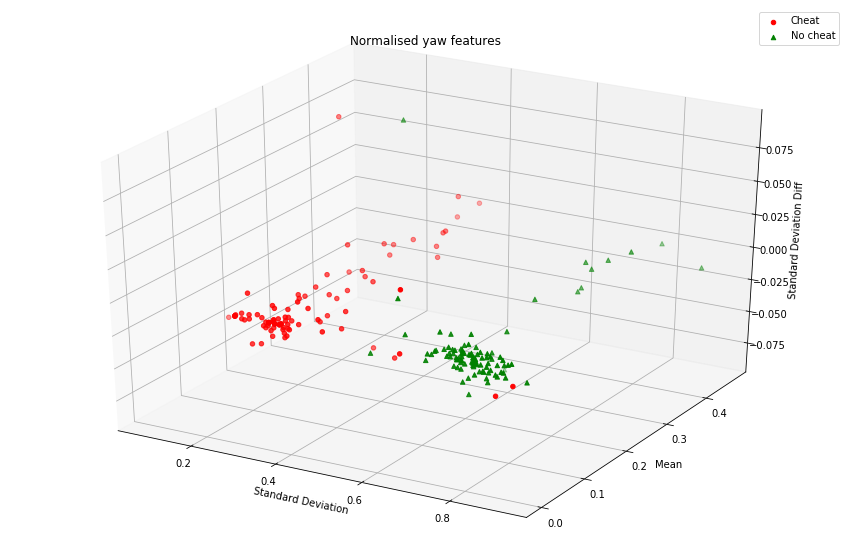

In [22]:
plot_3d(normalised_c_features_yaw, normalised_n_features_yaw, 'Normalised yaw features')